In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Library untuk visualisasi data

Library yang paling terkenal melakukan data visualization adalah **Matplotlib**

**Pandas** mengimplementasikan fungsi-fungsi visualisasi dengan **Matplotlib**.
Seaborn adalah *wrapper* dari **Matplotlib**.

Flow pemilihan library visualisasi :  
1. Untuk visualisasi sederhana cukup gunakan pandas
2. Untuk visualisasi yang lebih kompleks gunakan seaborn
3. Untuk mengatur elemen elemen spesifik pada visualisasi gunakan matplotlib

In [1]:
df = pd.read_csv('bike_sharing_clean.csv')
df

NameError: name 'pd' is not defined

# Univariate Visualization

Untuk melihat distribusi dari data, biasanya visualisasi yang digunakan adalah :
- Histogram  
Histogram adalah visualisasi yang menampilkan frekuensi kemunculan sample pada setiap grup / bin  
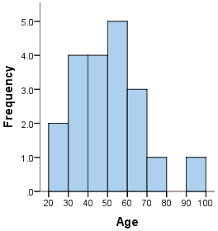

- Boxplot   
Boxplot adalah visualisasi yang menampilkan 5 statistik berupa minimum, q1, median(q2), q3 dan maximum  
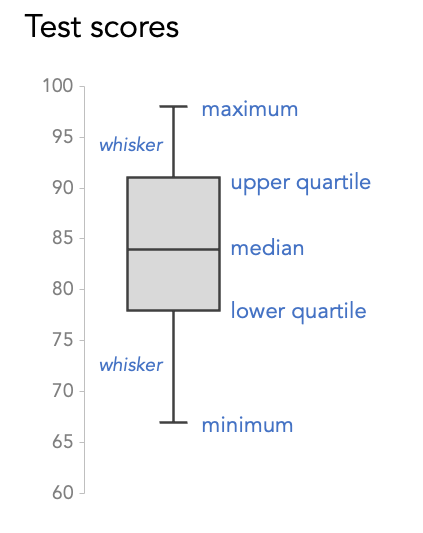

- Lineplot  
Lineplot adalah visualisasi yang menunjukkan pergereakan nilai dalam suatu rentang waktu  
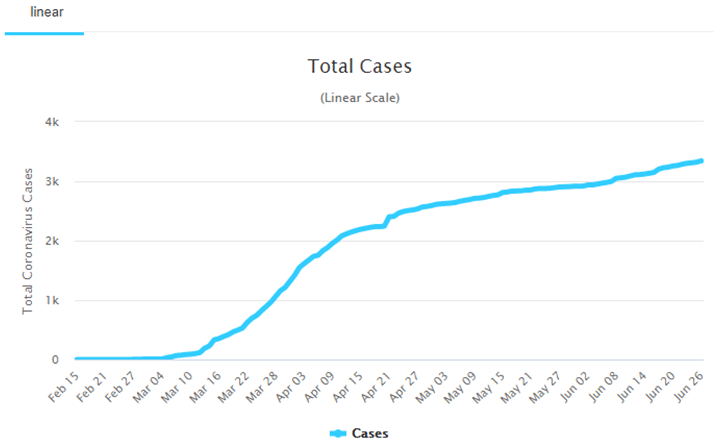

## Histogram

In [ ]:
df['registered'].plot(kind='hist',bins=50)

In [ ]:
sns.displot(data = df,x='registered',hue='season')

In [ ]:
sns.kdeplot(data = df,x='registered',hue='season')

## Boxplot

In [ ]:
df['temp'].plot(kind='box')

In [ ]:
sns.boxplot(data=df,y='temp',x='season')

## Lineplot / Barplot

In [ ]:
df.plot(x='datetime',y='total')

In [ ]:
# Ketika kolom tanggal masih menjadi string, matplotlib sering kesulitan menampilkan xlabel secara rapih
df['datetime'] = pd.to_datetime(df['datetime'])
df.plot(x='datetime',y='total')

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.groupby(['date'])['total'].sum().plot(kind='line')

In [ ]:
# Year on Year monthly plot
df.groupby(['year','month'])['total'].sum().unstack().transpose().plot(kind='line')

# Bivariate & Multivariate Visualization

- Scatter Plot  
Scatterplot adalah visualisasi yang menggunakan titik untuk mewakili nilai untuk dua variabel numerik yang berbeda
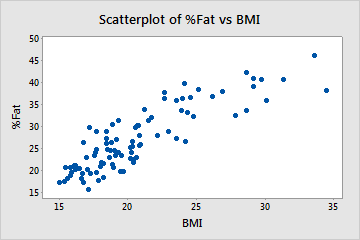


- Heatmap  
Heatmap adalah visualisasi atas 2 variabel kategorikal terhadap 1 kolom numerik
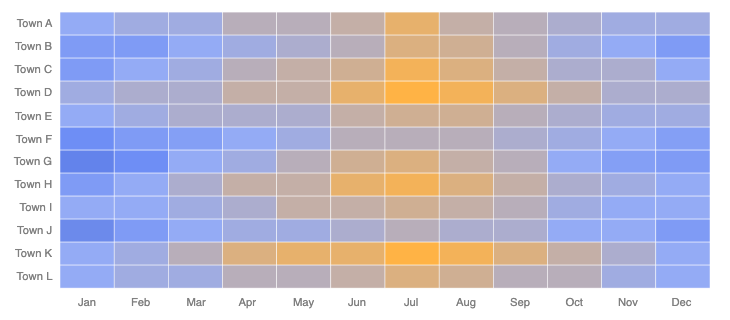

## Scatter plot

In [ ]:
df.plot(x='windspeed',y='registered',kind='scatter',alpha=0.1)

In [ ]:
sns.scatterplot(data=df,x='windspeed',y='temp',hue='season',alpha = 0.1) # Overplotting

## Heatmap

In [ ]:
df_plot = df.groupby(['weekday','hour'])['registered'].mean().unstack()

sns.heatmap(df_plot,cmap='magma')# Panduan cmap : https://seaborn.pydata.org/tutorial/color_palettes.html

# Challenge
Jawab semua soal dengan menggunakan visualisasi

In [ ]:
# Pada musim apa terjadi peminjaman sepeda paling banyak?

In [ ]:
# Bagaimana perbedaan perkembangan jumlah peminjam casual dan registered?

# Axes & Adjusting Visualization Component

Komponen visualisasi

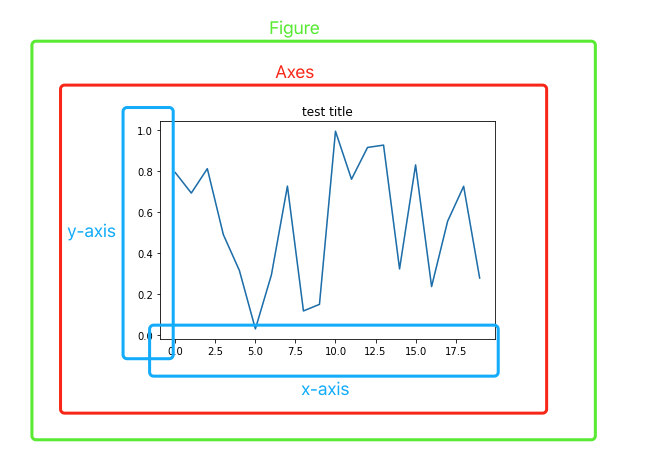

## Start plot awal

In [ ]:
df_plot = df.groupby(['year','season'])['total'].sum().unstack()
ax = df_plot.plot(kind='bar') 

## Atur posisi sesuai dengan waktu

In [ ]:
df_plot = df.groupby(['year','season'])['total'].sum().unstack()[['spring','summer','autumn','winter']]
ax = df_plot.plot(kind='bar') 

## Berikan warna sebagai visual cue

In [ ]:
df_plot

In [ ]:
df_plot = df.groupby(['year','season'])['total'].sum().unstack()[['spring','summer','autumn','winter']]
ax = df_plot.plot(kind='bar',color=['#D6F1C6','#F9CC87','#FF7F00','#C9F1FD']) 


## Berikan deskripsi yang lebih jelas

In [ ]:
df_plot = df.groupby(['year','season'])['total'].sum().unstack()[['spring','summer','autumn','winter']]
ax = df_plot.plot(kind='bar',color=['#D6F1C6','#F9CC87','#FF7F00','#C9F1FD']) 


ax.set_title('Banyaknya peminjaman sepeda\nberdasarkan tahun dan musim')
ax.set_xlabel("Tahun")
ax.set_ylabel("Peminjaman Total")

ax.set_xticks([0,1],labels = ['2011','2012'],rotation = 45)
ax.set_yticks(np.arange(0,1000000,100000));

## Berikan informasi tambahan yang bisa menunjukkan insight

In [ ]:
df_plot = df.groupby(['year','season'])['total'].sum().unstack()[['spring','summer','autumn','winter']]
ax = df_plot.plot(kind='bar',color=['#D6F1C6','#F9CC87','#FF7F00','#C9F1FD']) 


ax.set_title('Banyaknya peminjaman sepeda\nberdasarkan tahun dan musim')
ax.set_xlabel("Tahun")
ax.set_ylabel("Peminjaman Total")

ax.set_xticks([0,1],['2011','2012'],rotation = 0)

for year,average in df_plot.mean(axis=1).items():
    ax.hlines(average,year-0.4,year+0.4,color='black',linestyles='dotted')
    ax.text(year+0.13,average*1.02,f"Avg : {average}")
    
sns.despine() # Bonus untuk tampilan yang lebih minimalis

# Multiple visualization in Python

## Subplots

Digunakan untuk membuat beberapa chart dalam 1 visualisasi

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(10,5))

In [ ]:
fig,ax_subplot = plt.subplots(2,2,figsize=(10,5))

df['registered'].plot(kind='hist',bins=50,ax=ax_subplot[0,0])

df.plot(x='windspeed',y='registered',kind='scatter',ax=ax_subplot[0,1])

df_plot = df.groupby(['weekday','hour'])['registered'].mean().unstack()
sns.heatmap(df_plot,cmap='magma',ax=ax_subplot[1,0])# Panduan cmap : https://seaborn.pydata.org/tutorial/color_palettes.html

df.groupby(['year','season'])['total'].sum().unstack().plot(ax=ax_subplot[1,1],kind='bar')

ax_subplot[1,1].set_title('Chart pojok kanan bawah')

plt.tight_layout()

## Facet Grid

Mirip dengan subplots, akan tetapi digunakan ketika kita ingin membuat 1 visualisasi untuk kelompok yang berbeda

In [ ]:
df['hour_category'] = pd.cut(df['hour'],bins=[-1,6,12,17,21,24],labels=['malam-dini','pagi-siang','siang-sore','sore-malam','malam-dini'],ordered=False)

In [ ]:
df

In [ ]:
g = sns.FacetGrid(df, col="season",  row="hour_category")
g.map_dataframe(sns.histplot, x="casual")
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')